In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle

Step 1: Cleaning and Preparing the Data
The cleaned_nouns.csv is already saved and contains Word, and Gender_encoded fields. This serves as the input for embedding generation.

In [2]:
# Function to read the dataset
def read_dataset(file_path):
    """
    Load the dataset from a CSV file.
    :param file_path: Path to the CSV file.
    :return: Pandas DataFrame.
    """
    dataset = pd.read_csv(file_path, dtype=str, index_col = 0)
    print(f"Dataset loaded. Shape: {dataset.shape}")
    print(dataset.head(10))
    return dataset


In [3]:
# File path to the nouns dataset
file_path = r"C:\Users\user1\Desktop\HarvestWE-main\HarvestWE-main\Data\Morphalou\all_nouns_v2.csv"

# Load the dataset
nouns = read_dataset(file_path)

Dataset loaded. Shape: (179950, 3)
                 Number     Gender       Lemma
Word                                          
100-mètres   invariable  masculine  100-mètres
2D           invariable   feminine          2D
3D           invariable   feminine          3D
µA           invariable  masculine           A
a            invariable  masculine           a
a b c          singular  masculine       a b c
 a demi-mot    singular  masculine  a demi-mot
a-mi-la        singular  masculine     a-mi-la
aa           invariable  masculine          aa
aabam          singular  masculine       aabam


In [4]:
nouns = nouns[(nouns.Number != 'invariable') & (nouns.Gender != 'invariable')]
nouns

,Number,Gender,Lemma
Word,,,
a b c,singular,masculine,a b c
a demi-mot,singular,masculine,a demi-mot
a-mi-la,singular,masculine,a-mi-la
aabam,singular,masculine,aabam
aalénien,singular,masculine,aalénien
...,...,...,...
œuvre,singular,feminine,œuvre
œuvres,plural,feminine,œuvre
œuvre-testament,singular,feminine,œuvre-testament


In [5]:
# Function to clean the dataset
def clean_dataset(dataset, feature_columns):
    """
    Clean the dataset by removing rows with missing values in specified columns.
    :param dataset: Input DataFrame.
    :param feature_columns: List of columns to check for missing values.
    :return: Cleaned DataFrame.
    """
    cleaned_dataset = dataset.dropna(subset=feature_columns)

    print(f"Dataset cleaned. Remaining rows: {cleaned_dataset.shape[0]}")
    return cleaned_dataset



In [6]:
# Step 2: Clean the dataset (focus on Gender column)
nouns_cleaned  = clean_dataset(nouns, feature_columns=['Gender'])
nouns_cleaned 

Dataset cleaned. Remaining rows: 170766


,Number,Gender,Lemma
Word,,,
a b c,singular,masculine,a b c
a demi-mot,singular,masculine,a demi-mot
a-mi-la,singular,masculine,a-mi-la
aabam,singular,masculine,aabam
aalénien,singular,masculine,aalénien
...,...,...,...
œuvre,singular,feminine,œuvre
œuvres,plural,feminine,œuvre
œuvre-testament,singular,feminine,œuvre-testament


In [7]:

# Function to encode features
def encode_feature(feature):
    """
    Encode categorical features as numeric values.
    :param feature: Pandas Series to encode.
    :return: Encoded feature.
    """
    le = LabelEncoder()
    le.fit(feature.unique())
    feature_encoded = le.transform(feature)
    return feature_encoded



In [8]:
def preprocess_dataset(dataset, feature_name, encode_as1=None, normalize_columns=None, remove_original=False):
    """
    Preprocess the dataset by encoding features and normalizing specified columns.
    :param dataset: Input DataFrame.
    :param feature_name: The feature to encode as binary.
    :param encode_as1: Map one of the feature's values to 1, others to 0.
    :param normalize_columns: List of columns to normalize.
    :param remove_original: Whether to remove the original categorical column.
    :return: Preprocessed DataFrame.
    """
    # Encode Gender
    if encode_as1:
        dataset[f"{feature_name}_encoded"] = (dataset[feature_name] == encode_as1).astype(int)
    else:
        dataset[f"{feature_name}_encoded"] = encode_feature(dataset[feature_name])

    print(f"Feature '{feature_name}' encoded. Sample:")
    print(dataset[[feature_name, f"{feature_name}_encoded"]].head(10))
    
    # Normalize specified columns
    if normalize_columns:
        scaler = MinMaxScaler()
        dataset[normalize_columns] = scaler.fit_transform(dataset[normalize_columns])
        print(f"Columns normalized: {normalize_columns}")
        print(dataset[normalize_columns].head(5))
    
    # Remove original categorical column if specified
    if remove_original:
        dataset = dataset.drop(columns=[feature_name])
        print(f"Original feature '{feature_name}' removed.")

    return dataset


In [9]:
# Preprocess the dataset and reassign the updated DataFrame
nouns_cleaned = preprocess_dataset(
    dataset=nouns_cleaned,
    feature_name='Gender',
    encode_as1='masculine',
    normalize_columns=None,
    remove_original=True  # Remove the categorical column
)



Feature 'Gender' encoded. Sample:
                Gender  Gender_encoded
Word                                  
a b c        masculine               1
 a demi-mot  masculine               1
a-mi-la      masculine               1
aabam        masculine               1
aalénien     masculine               1
aaléniens    masculine               1
aba          masculine               1
abaca        masculine               1
abacas       masculine               1
abacule      masculine               1
Original feature 'Gender' removed.


In [10]:
# Print the updated DataFrame
print(nouns_cleaned.head())

               Number       Lemma  Gender_encoded
Word                                             
a b c        singular       a b c               1
 a demi-mot  singular  a demi-mot               1
a-mi-la      singular     a-mi-la               1
aabam        singular       aabam               1
aalénien     singular    aalénien               1


In [11]:
print(nouns_cleaned)

                   Number            Lemma  Gender_encoded
Word                                                      
a b c            singular            a b c               1
 a demi-mot      singular       a demi-mot               1
a-mi-la          singular          a-mi-la               1
aabam            singular            aabam               1
aalénien         singular         aalénien               1
...                   ...              ...             ...
œuvre            singular            œuvre               0
œuvres             plural            œuvre               0
œuvre-testament  singular  œuvre-testament               0
œuvrette         singular         œuvrette               0
œuvrettes          plural         œuvrette               0

[170766 rows x 3 columns]


In [12]:
nouns_cleaned = nouns_cleaned.reset_index()
print(nouns_cleaned.columns)

Index(['Word', 'Number', 'Lemma', 'Gender_encoded'], dtype='object')


In [13]:
nouns_cleaned.to_csv("cleaned_nouns.csv", index=False)


Step 2: Generate Embeddings and Save Results
The generate_embeddings_with_gender_and_pooling function efficiently handles:

- Tokenization

- Subword pooling

- Associating embeddings with gender labels

- Save embeddings in both CSV and pickle formats. This redundancy ensures flexibility in future use cases ( pickle for Python scripts, CSV for external tools).

In [2]:

import torch
from transformers import AutoTokenizer, AutoModel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn

class WENotFound(Exception):
    """Exception raised when a word embedding is not found."""
    pass

# Function to load the model and tokenizer
def load_model_and_tokenizer(model_name):
    """
    Load a pre-trained model and its tokenizer.
    :param model_name: Name of the pre-trained model.
    :return: Model and tokenizer objects.
    """
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    return model, tokenizer

def generate_embeddings_with_gender_and_pooling(words_df, model, tokenizer):
    """
    Generate embeddings for a list of words with pooling, storing Gender labels.
    :param words_df: DataFrame with words and their Gender labels.
    :param model: Pre-trained language model.
    :param tokenizer: Corresponding tokenizer.
    :return: DataFrame with embeddings and Gender labels.
    """
    embeddings = []
    skipped_words = []
    
    for _, row in words_df.iterrows():
        word = row["Word"]
        gender = row["Gender_encoded"]  # Extract Gender label
        try:
            # Tokenize the word
            tokens = tokenizer(word, return_tensors="pt", add_special_tokens=True)
            token_ids = tokens["input_ids"]
            
            # Get the embeddings (apply mean pooling)
            with torch.no_grad():
                outputs = model(**tokens)
                hidden_states = outputs.last_hidden_state  # [Batch, Tokens, Embedding Dim]
                word_embedding = hidden_states.mean(dim=1).squeeze().numpy()  # Mean pooling
            # Convert embedding to a **properly formatted string** for CSV storage
            embedding_str = "[" + ",".join(map(str, word_embedding.tolist())) + "]"

            # Store word, embedding, and gender
            embeddings.append({"Word": word, "Embedding": embedding_str, "Gender": gender})
        
        except Exception as e:
            print(f"Error processing word {word}: {e}")
            skipped_words.append(word)
    
    print(f"Skipped words due to errors: {len(skipped_words)}")
    
    # Create a DataFrame for embeddings
    emb_df = pd.DataFrame(embeddings)
    return emb_df


In [3]:
# Define model names
model_names = {
    "TinyBERT": "huawei-noah/TinyBERT_General_4L_312D",
    "DistilBERT": "distilbert-base-uncased"

}

# Load dataset (cleaned nouns with Gender labels)
nouns_cleaned = pd.read_csv("cleaned_nouns.csv")

# Generate embeddings for each model
for model_label, model_name in model_names.items():
    print(f"Processing embeddings for {model_label}...")
    model, tokenizer = load_model_and_tokenizer(model_name)
    embeddings_df = generate_embeddings_with_gender_and_pooling(nouns_cleaned, model, tokenizer)
    
    # Display how the embeddings DataFrame looks like
    print(f"Sample embeddings for {model_label}:")
    print(embeddings_df.head())

    # Save embeddings to CSV
    embeddings_df.to_csv(f"{model_label}_embeddings_with_gender_1.csv", index=False)
    print(f"Saved embeddings for {model_label}.")

 
    # Save embeddings
    embeddings_df.to_pickle(f"{model_label}_embeddings.pkl")
    print(f"Saved embeddings for {model_label}.")
    
    

Processing embeddings for TinyBERT...
Skipped words due to errors: 0
Sample embeddings for TinyBERT:
          Word                                          Embedding  Gender
0        a b c  [0.11995907127857208,-0.26378750801086426,-0.0...       1
1   a demi-mot  [-0.12381567060947418,0.13664910197257996,-0.1...       1
2      a-mi-la  [-0.1846310943365097,-0.12790870666503906,-0.1...       1
3        aabam  [-0.2076360434293747,0.07956670224666595,0.006...       1
4     aalénien  [-0.2762066721916199,0.13955533504486084,0.090...       1
Saved embeddings for TinyBERT.
Saved embeddings for TinyBERT.
Processing embeddings for DistilBERT...
Skipped words due to errors: 0
Sample embeddings for DistilBERT:
          Word                                          Embedding  Gender
0        a b c  [0.05069553852081299,0.1623333990573883,0.0832...       1
1   a demi-mot  [0.06715820729732513,-0.06176798418164253,-0.0...       1
2      a-mi-la  [0.07438818365335464,0.25183528661727905,0.267... 

In [ ]:
 # File path to the nouns dataset
file_path = r"C:\Users\user1\Desktop\HarvestWE-main\TinyBERT_embeddings_with_gender_1.csv"

# Step 1: Load the dataset
nouns = read_dataset(file_path)
print(nouns.info)
print(len(nouns["Embedding"][0])) 


Dataset loaded. Shape: (170766, 2)
                                                     Embedding Gender
Word                                                                 
a b c        [0.11995907127857208,-0.26378750801086426,-0.0...      1
 a demi-mot  [-0.12381567060947418,0.13664910197257996,-0.1...      1
a-mi-la      [-0.1846310943365097,-0.12790870666503906,-0.1...      1
aabam        [-0.2076360434293747,0.07956670224666595,0.006...      1
aalénien     [-0.2762066721916199,0.13955533504486084,0.090...      1
aaléniens    [-0.2837306261062622,0.0611804835498333,0.1307...      1
aba          [-0.21133752167224884,0.1426362544298172,-0.07...      1
abaca        [-0.23609936237335205,0.2080247551202774,0.006...      1
abacas       [-0.21839667856693268,0.17796465754508972,-0.0...      1
abacule      [-0.225363090634346,0.14417433738708496,0.0188...      1
<bound method DataFrame.info of                                                          Embedding Gender
Word               

C:\Users\user1\AppData\Local\Temp\ipykernel_4204\2796571698.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(len(nouns["Embedding"][0]))  # Should return 312 for TinyBERT, 768 for DistilBERT, etc.


In [6]:
 # File path to the nouns dataset
file_path = r"C:\Users\user1\Desktop\HarvestWE-main\TinyBERT_embeddings_with_gender_1.csv"

# Step 1: Load the dataset
nouns = read_dataset(file_path)
print(nouns.info())


Dataset loaded. Shape: (170766, 2)
                                                     Embedding Gender
Word                                                                 
a b c        [0.11995907127857208,-0.26378750801086426,-0.0...      1
 a demi-mot  [-0.12381567060947418,0.13664910197257996,-0.1...      1
a-mi-la      [-0.1846310943365097,-0.12790870666503906,-0.1...      1
aabam        [-0.2076360434293747,0.07956670224666595,0.006...      1
aalénien     [-0.2762066721916199,0.13955533504486084,0.090...      1
aaléniens    [-0.2837306261062622,0.0611804835498333,0.1307...      1
aba          [-0.21133752167224884,0.1426362544298172,-0.07...      1
abaca        [-0.23609936237335205,0.2080247551202774,0.006...      1
abacas       [-0.21839667856693268,0.17796465754508972,-0.0...      1
abacule      [-0.225363090634346,0.14417433738708496,0.0188...      1
<class 'pandas.core.frame.DataFrame'>
Index: 170766 entries, a b c to œuvrettes
Data columns (total 2 columns):
 #   Column  

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

def plot_embeddings_heatmap(embeddings_df, model_label, max_words=100, size=(20, 10), cmap="YlGnBu", save_path=None):
    """
    Plot a heatmap of embeddings.
    
    :param embeddings_df: DataFrame containing embeddings (Word, Embedding).
    :param model_label: Name of the model (for title purposes).
    :param max_words: Maximum number of words to include in the heatmap.
    :param size: Tuple for the figure size (width, height).
    :param cmap: Color map for the heatmap.
    :param save_path: File path to save the heatmap as an image (optional).
    """
    # Convert embedding strings to lists of floats
    embeddings_df['Embedding'] = embeddings_df['Embedding'].apply(ast.literal_eval)
    
    # Extract embeddings and convert them into a matrix
    embedding_matrix = np.vstack(embeddings_df["Embedding"].values[:max_words])
    
    # Extract the corresponding words for the heatmap
    words = embeddings_df["Word"].values[:max_words]

    # Create the heatmap
    plt.figure(figsize=size)
    sns.heatmap(embedding_matrix, cmap=cmap, xticklabels=False, yticklabels=words, cbar=True)
    plt.title(f"{model_label} Embeddings Heatmap", fontsize=16)
    plt.xlabel("Embedding Dimensions", fontsize=14)
    plt.ylabel("Words", fontsize=14)
    
    # Save the heatmap if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
        print(f"Heatmap saved at {save_path}")
    
    plt.show()

# Example Usage
# Assuming embeddings_df is the DataFrame with the embeddings generated previously
plot_embeddings_heatmap(
    embeddings_df=embeddings_df,
    model_label="TinyBERT",
    max_words=50,
    size=(15, 8),
    cmap="viridis",
    save_path="TinyBERT_embeddings_heatmap.png"
)


NameError: name 'embeddings_df' is not defined

Heatmap saved at DistilBERT.png


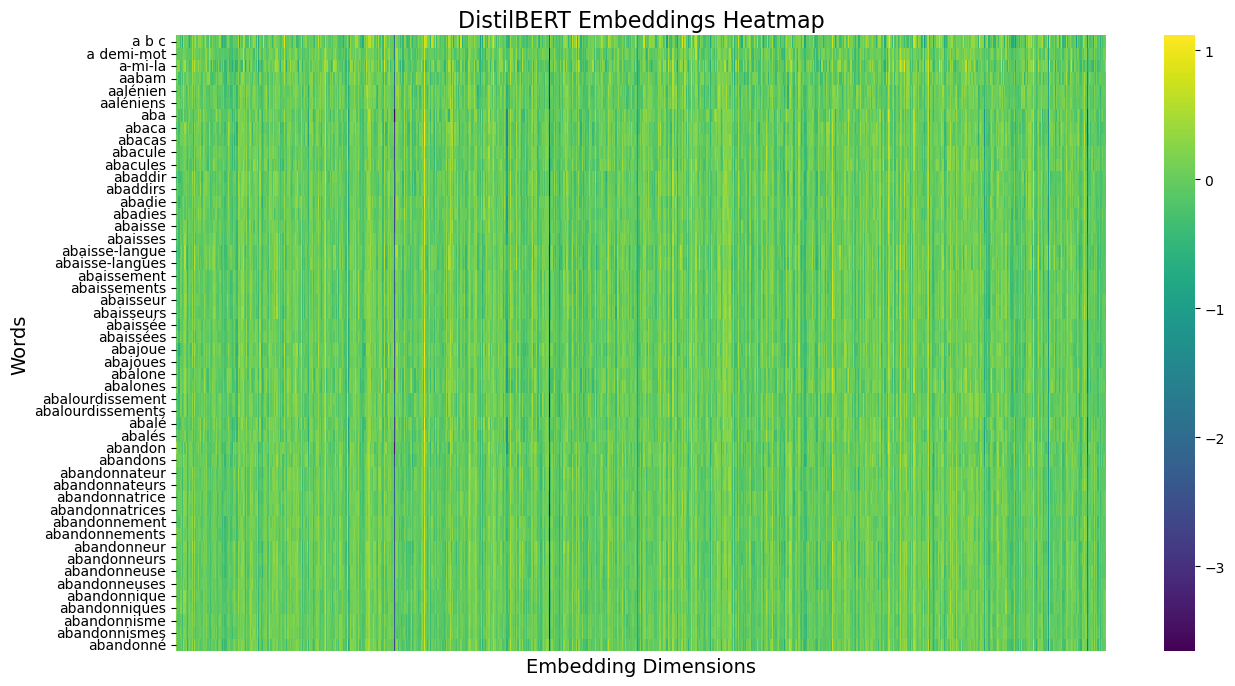

In [19]:
# Assuming embeddings_df is the embeddings DataFrame
plot_embeddings_heatmap(
    embeddings_df=embeddings_df,
    model_label="DistilBERT",
    max_words=50,
    size=(15, 8),
    cmap="viridis",
    save_path="DistilBERT.png"
)


In [7]:
import pandas as pd

# Define the list of model names with their full file paths
model_names = {
    "TinyBERT": r"C:\Users\user1\Desktop\HarvestWE-main\TinyBERT_embeddings_with_gender_1.csv",
    "DistilBERT": r"C:\Users\user1\Desktop\HarvestWE-main\DistilBERT_embeddings_with_gender_1.csv",
}

sizes = []

for model_label, file_path in model_names.items():
    try:
        # Load the embedding dataset for the current model
        noun_we = pd.read_csv(file_path)
        
        # Calculate the size of the dataset (unique wordforms with valid gender and number)
        noun_size = len(noun_we[(noun_we["Gender"] != 'invariable') & (noun_we["Gender"].notna())])
        
        # Append the size information
        sizes.append({
            'Model': model_label,
            'Nouns': noun_size,
        })
    except FileNotFoundError:
        print(f"File not found for model: {model_label}. Ensure '{file_path}' exists in the specified path.")

# Create a DataFrame to display the results
sizes_df = pd.DataFrame(sizes)

# Display the sizes DataFrame
print(sizes_df)


        Model   Nouns
0    TinyBERT  170766
1  DistilBERT  170766


In [8]:
!pip install transformers

In [10]:
import pandas as pd

# Function to analyze tokenization for a list of words
def analyze_tokenization(test_words, model_name, tokenizer, save_as='pkl'):
    """
    Analyze the tokenization of words using a specific model and tokenizer.
    :param test_words: List of words to analyze.
    :param model_name: Name of the model for labeling.
    :param tokenizer: Tokenizer object.
    :param save_as: File format to save results ('pkl' or 'csv').
    :return: DataFrame containing tokenization analysis.
    """
    tokenization_results = []

    for w in test_words:
        tokenized_ids = tokenizer.encode(w, add_special_tokens=True)  # Encode word
        decoded_tokens = [tokenizer.decode(x) for x in tokenized_ids]  # Decode each token ID
        tokenization_results.append({
            'Word': w,
            'Tokenized_IDs': tokenized_ids,
            'Decoded_Tokens': decoded_tokens
        })

    # Create a DataFrame
    tokenization_df = pd.DataFrame(tokenization_results)

    # Save the results to the desired format
    filename = f"{model_name}_tokenization_results"
    if save_as == 'pkl':
        tokenization_df.to_pickle(f"{filename}.pkl")
    elif save_as == 'csv':
        tokenization_df.to_csv(f"{filename}.csv", index=False)

    print(f"Tokenization results saved as {filename}.{save_as}")
    return tokenization_df


# Initialize models and tokenizers
from transformers import AutoTokenizer

models = {
    "TinyBERT": "huawei-noah/TinyBERT_General_4L_312D",
    "DistilBERT": "distilbert-base-uncased"
}

test_words = [
    'marquante', 'imparfaite', 'déclassement', 'postérieurs', 'absorbent', 'accorda', 'accrédité',
    'humilité', 'dures', 'brune', 'reçoit', 'rétroaction', 'niçois', 'inventée', 'cutanées',
    'gaieté', 'polémiques', 'approuver', 'rencontrait', 'luttent', 'collent', 'démolir'
]

# Analyze tokenization for each model
for model_label, model_path in models.items():
    print(f"Processing tokenization for {model_label}...")
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    tokenization_df = analyze_tokenization(test_words, model_label, tokenizer, save_as='csv')
    print(tokenization_df.head())


Processing tokenization for TinyBERT...
Tokenization results saved as TinyBERT_tokenization_results.csv
           Word                        Tokenized_IDs  \
0     marquante       [101, 9388, 16211, 10111, 102]   
1    imparfaite  [101, 17727, 2906, 7011, 4221, 102]   
2  déclassement      [101, 11703, 27102, 13665, 102]   
3   postérieurs       [101, 13082, 17301, 2869, 102]   
4     absorbent              [101, 16888, 4765, 102]   

                           Decoded_Tokens  
0       [[CLS], mar, ##qua, ##nte, [SEP]]  
1  [[CLS], imp, ##ar, ##fa, ##ite, [SEP]]  
2    [[CLS], dec, ##lass, ##ement, [SEP]]  
3     [[CLS], poster, ##ieu, ##rs, [SEP]]  
4           [[CLS], absorb, ##ent, [SEP]]  
Processing tokenization for DistilBERT...
Tokenization results saved as DistilBERT_tokenization_results.csv
           Word                        Tokenized_IDs  \
0     marquante       [101, 9388, 16211, 10111, 102]   
1    imparfaite  [101, 17727, 2906, 7011, 4221, 102]   
2  déclassement    